<img src="https://www.python.org/static/img/python-logo.png">

# Welcome to my lessons

---

**Bo Zhang** (NAOC, <mailto:bozhang@nao.cas.cn>) will have a few lessons on python.

- These are **very useful knowledge, skills and code styles** when you use `python` to process astronomical data.
- All materials can be found on [**my github page**](https://github.com/hypergravity/cham_teaches_python).
- **jupyter notebook** (formerly named **ipython notebook**) is recommeded to use

---
These lectures are organized as below:
1. install python
2. basic syntax
3. numerical computing
4. scientific computing
5. plotting
6. astronomical data processing
7. high performance computing
8. version control


# numpy
Docs: [http://docs.scipy.org/doc/numpy/user/index.html](http://docs.scipy.org/doc/numpy/user/index.html)
# scipy
Docs: [http://docs.scipy.org/doc/scipy/reference/index.html](http://docs.scipy.org/doc/scipy/reference/index.html)

# scipy.optimize.minimize
Docs: [http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

# optimization / minimization
![](https://upload.wikimedia.org/wikipedia/commons/7/72/Max_paraboloid.svg)

Populating the interactive namespace from numpy and matplotlib


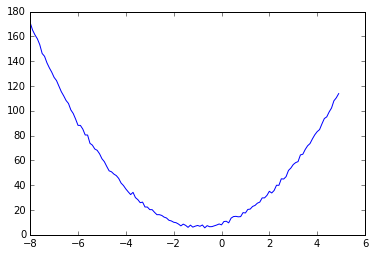

In [1]:
%pylab inline
np.random.seed(0)
p = [3.2, 5.6, 9.2]
x = np.arange(-8., 5., 0.1)
y = np.polyval(p, x) + np.random.randn(x.shape[0])*1.

plt.plot(x, y);

In [2]:
# STEP 1 - define your model
def my_model(p, x):
    return np.polyval(p, x)

# STEP 2 - define your cost function
def my_costfun(p, x, y):
    return np.sum((my_model(p, x) - y)**2)

# STEP 3 - minimize cost function
from scipy.optimize import minimize
result = minimize(my_costfun, np.array([2., 3., 5.]), args=(x,y) )

In [3]:
print result

      fun: 126.02444944605068
 hess_inv: array([[ 0.00017484,  0.00052583, -0.00131789],
       [ 0.00052583,  0.00163642, -0.00423834],
       [-0.00131789, -0.00423834,  0.01130756]])
      jac: array([  1.98364258e-04,  -1.90734863e-05,   3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 245
      nit: 6
     njev: 48
   status: 2
  success: False
        x: array([ 3.22413722,  5.69072788,  9.08476247])


In [4]:
print 'RESULT:\n', result
print ''
print 'RELATIVE ERROR:\n', (result.x - p)/p*100., '%'
print ''
print 'Hessian ERROR:' #err = sqrt(diag(inv(Hessian)))
hess_err = np.sqrt(np.diag(result['hess_inv']))
print hess_err

RESULT:
      fun: 126.02444944605068
 hess_inv: array([[ 0.00017484,  0.00052583, -0.00131789],
       [ 0.00052583,  0.00163642, -0.00423834],
       [-0.00131789, -0.00423834,  0.01130756]])
      jac: array([  1.98364258e-04,  -1.90734863e-05,   3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 245
      nit: 6
     njev: 48
   status: 2
  success: False
        x: array([ 3.22413722,  5.69072788,  9.08476247])

RELATIVE ERROR:
[ 0.75428815  1.6201407  -1.2525818 ] %

Hessian ERROR:
[ 0.01322257  0.04045265  0.106337  ]


# MCMC (emcee)
- MCMC is a convenient tool for drawing a sample from a given probability distribution.
- Therefore, is mostly used to estimate parameters in Bayesian way.
- emcee: [http://dan.iel.fm/emcee/current/#](http://dan.iel.fm/emcee/current/#)

In [5]:
from emcee import EnsembleSampler

## a simple example - draw sample from uniformly distribution

In [6]:
def lnprob(theta):
    theta = np.array(theta)
    if np.all(theta>-3.) and np.all(theta<3.):
        return 0
    return -np.inf

In [7]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob)
pos = sampler.run_mcmc(p0, 1000)

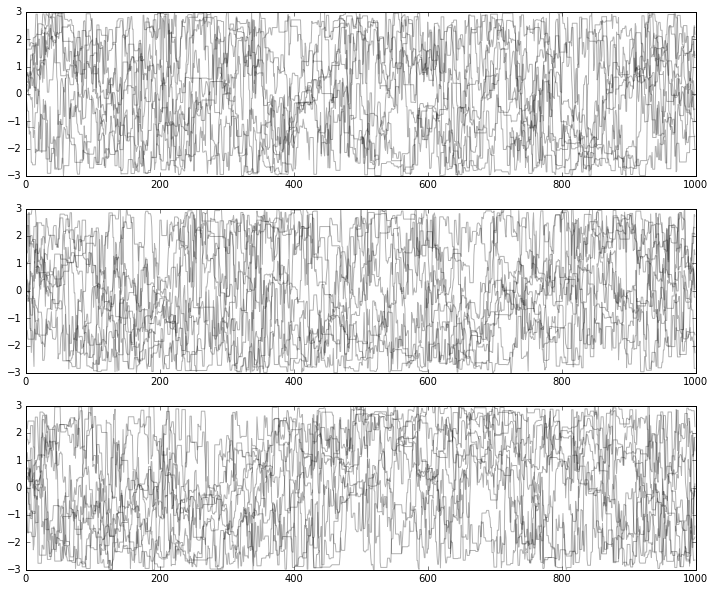

In [8]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

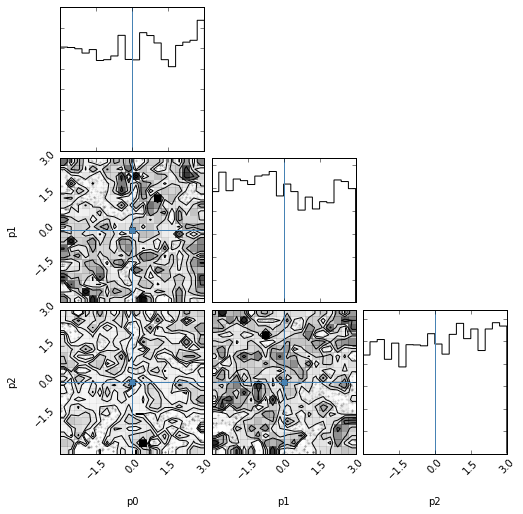

In [9]:
import corner
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=[0., 0., 0.])
# fig.savefig("triangle.png")

## how about Gaussian distribution?
* 1-D Gauassian

    $p(x|\mu, \sigma) \propto 
    \exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$


* N-D Gauassian

    $p(\overrightarrow{x}|\overrightarrow{\mu}, \Sigma) \propto \exp{(-\frac{1}{2}(\overrightarrow{x}-\overrightarrow{\mu})^T\Sigma (\overrightarrow{x}-\overrightarrow{\mu}))}$
          
    where $\Sigma$ is the covariance matrix

In [10]:
def lnprob(x, mu, ivar):
#     if np.all(np.abs(x)<100.):
    x = x.reshape(-1, 1)
    mu = mu.reshape(-1, 1)
    return -np.dot(np.dot((x-mu).T, ivar), x-mu)
#     else:
#         return -np.inf

In [11]:
mu = np.array([0.1, 0.2, 0.5])
cov = np.array([[1.0, 0.0, 0.0],
                [0.0, 10, 9],
                [0.0, 9, 10]])
ivar = np.linalg.inv(cov)
print 'ivar: \n', ivar
print 'det(cov): \n', np.linalg.det(cov)
print 'det(ivar): \n', np.linalg.det(ivar)

ivar: 
[[ 1.          0.          0.        ]
 [ 0.          0.52631579 -0.47368421]
 [ 0.         -0.47368421  0.52631579]]
det(cov): 
19.0
det(ivar): 
0.0526315789474


In [12]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(mu, ivar), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 2000)

In [13]:
p0

[array([ 0.7395508 ,  0.49045881,  0.22741463]),
 array([ 0.25435648,  0.05802916,  0.43441663]),
 array([ 0.31179588,  0.69634349,  0.37775184]),
 array([ 0.17960368,  0.02467873,  0.06724963]),
 array([ 0.67939277,  0.45369684,  0.53657921]),
 array([ 0.89667129,  0.99033895,  0.21689698]),
 array([ 0.6630782 ,  0.26332238,  0.020651  ]),
 array([ 0.75837865,  0.32001715,  0.38346389]),
 array([ 0.58831711,  0.83104846,  0.62898184]),
 array([ 0.87265066,  0.27354203,  0.79804683])]

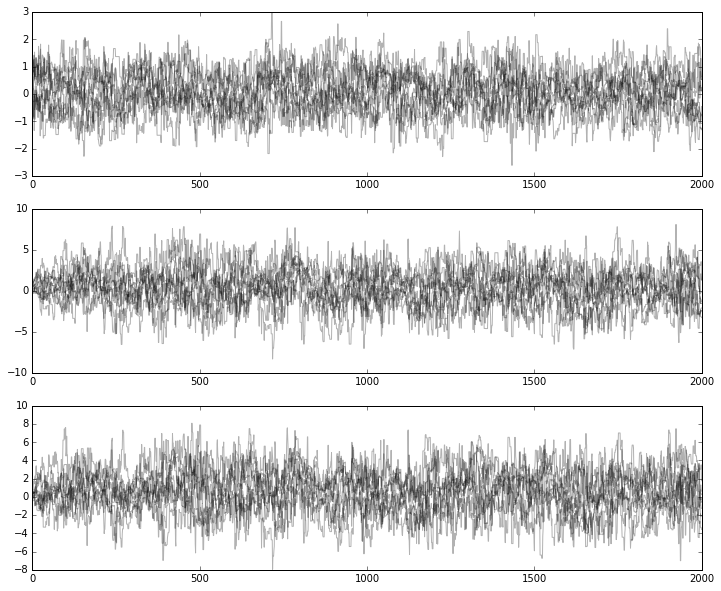

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

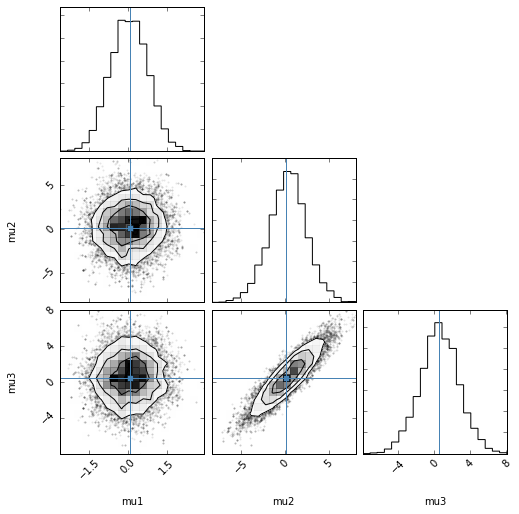

In [15]:
fig = corner.corner(sampler.flatchain, labels=["mu1", "mu2", "mu3"],
                    truths=mu)

In [16]:
print mu
print ivar

[ 0.1  0.2  0.5]
[[ 1.          0.          0.        ]
 [ 0.          0.52631579 -0.47368421]
 [ 0.         -0.47368421  0.52631579]]


## how to use MCMC to estimate model parameters?

suppose you choose a Gaussian likelihood:

$L(\theta|x_i,model) \propto \exp{(-\frac{(x_i-x_{i, model})^2}{2\sigma^2})} $

$ \log{(L(\theta|x_i,model))} \propto -\frac{(x_i-x_{i, model})^2}{2\sigma^2} = -\frac{1}{2}{\chi^2}$


In [17]:
def lnprior(theta):
    if np.all(np.abs(theta)<10000.):
        return 0
    else:
        return -np.inf

In [18]:
def lnlike(theta, x, y):
    y_model = np.polyval(theta, x)
    return -np.sum((y_model-y)**2)

In [19]:
def lnprob(theta, x, y):
    return lnprior(theta)+lnlike(theta, x, y)

In [20]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 500)

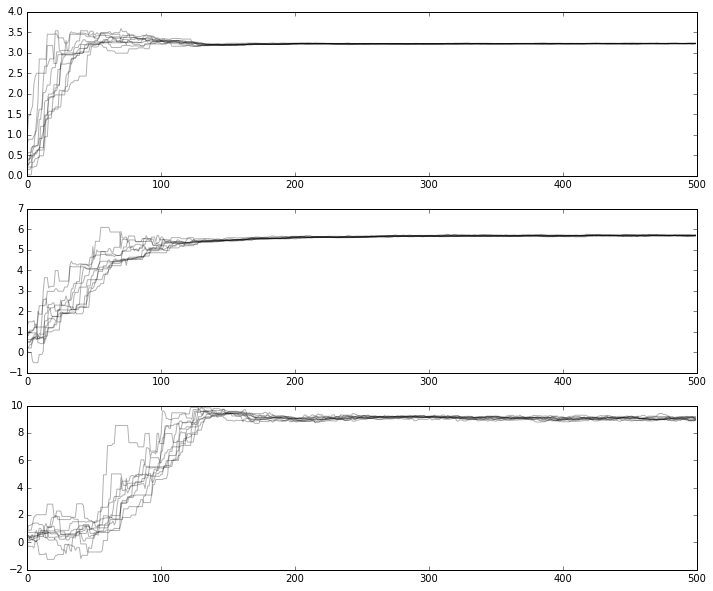

In [21]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

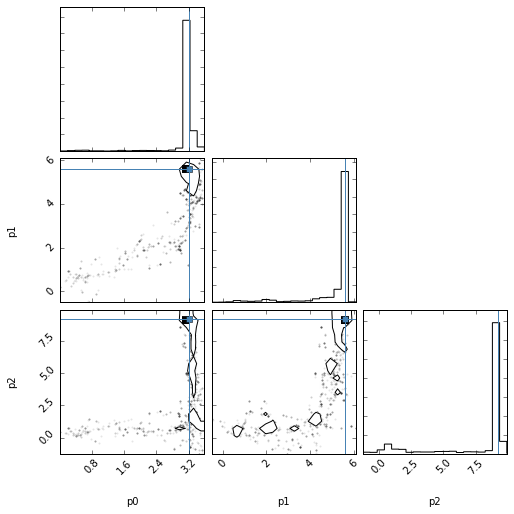

In [22]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)

In [23]:
sampler.reset()
pos,prob,state = sampler.run_mcmc(pos, 2000)

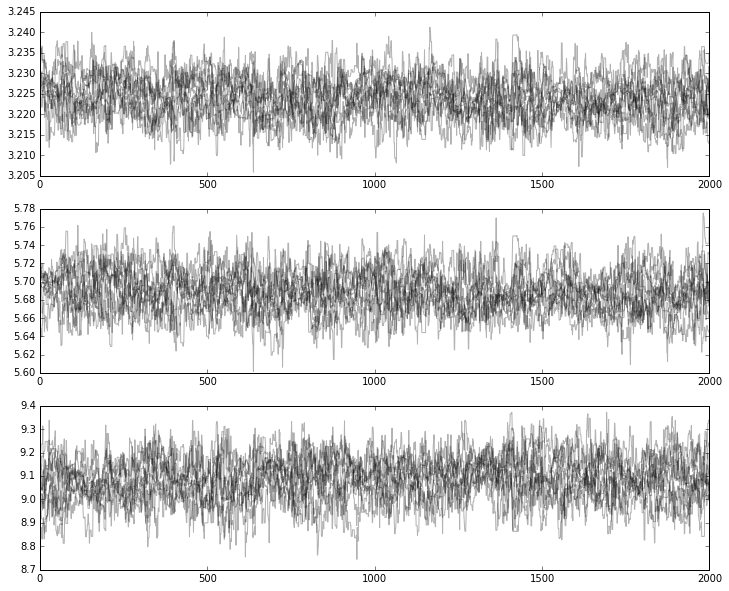

In [24]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3);

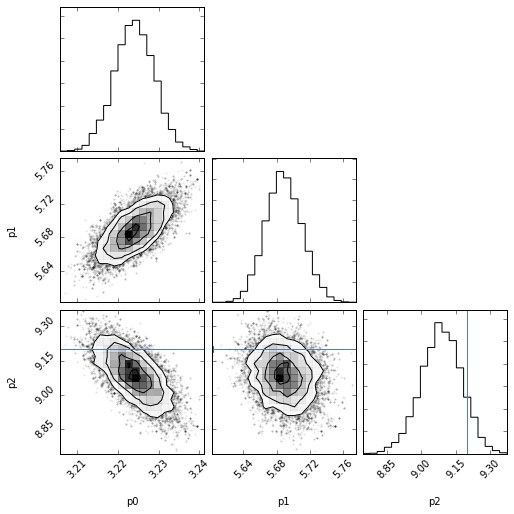

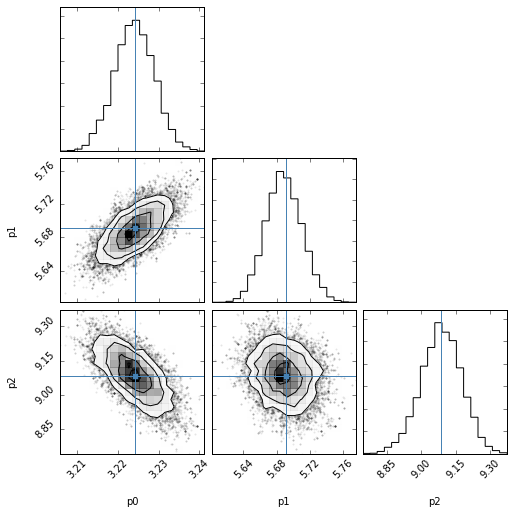

In [29]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=result.x)

## comparison with the results from optimization

In [26]:
# truth
p

[3.2, 5.6, 9.2]

In [27]:
# MCMC results
np.percentile(sampler.flatchain, [15., 50., 85.], axis=0)

array([[ 3.21908185,  5.66655696,  8.99618546],
       [ 3.22411158,  5.68827311,  9.08791289],
       [ 3.22909087,  5.71157073,  9.17812294]])

In [28]:
print result.x - hess_err
print result.x
print result.x + hess_err

[ 3.21091466  5.65027523  8.97842547]
[ 3.22413722  5.69072788  9.08476247]
[ 3.23735979  5.73118053  9.19109948]
